In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import statsmodels.api as sm

from datetime import datetime

df = pd.read_csv("southern_osc.csv",  index_col=['Date'], parse_dates=['Date'], dayfirst=False) # считываем датасет
df.head() 

,T_i
Date,
1951-01-01,1.5
1951-02-01,0.9
1951-03-01,-0.1
1951-04-01,-0.3
1951-05-01,-0.7


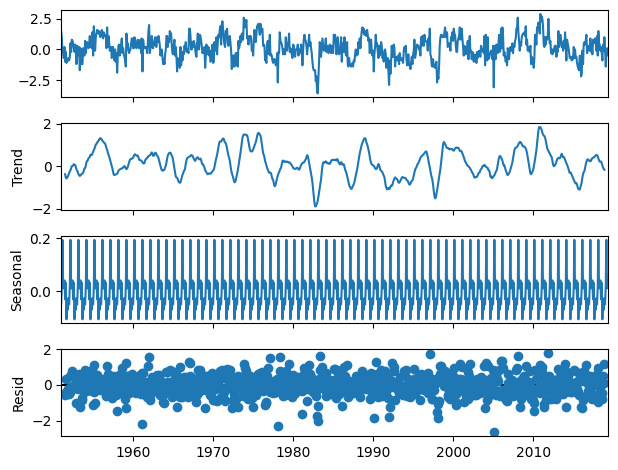

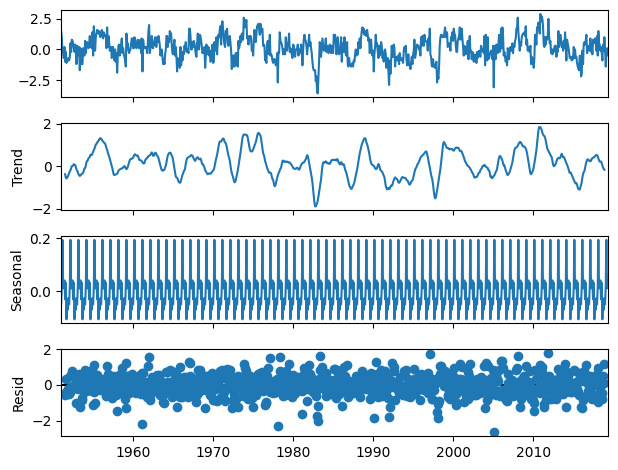

In [11]:
#импортируем библиотеку 
from statsmodels.tsa.seasonal import seasonal_decompose
#производим декомпозицию временного ряда 
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
fig

In [4]:
test_df = df.iloc[-1]
train_df = df.iloc[:-1]

In [5]:
from statsmodels.tsa.api import SimpleExpSmoothing
ses = SimpleExpSmoothing(train_df)
alpha = 0.7
model = ses.fit(smoothing_level = alpha, optimized = False)
exp_pred = model.forecast(1)
exp_pred

c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


821   -0.302693
dtype: float64

In [95]:
def stat_test(df):
    test = sm.tsa.adfuller(df)
    print ('adf: ', test[0] )
    print ('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')

stat_test(train_df)

adf:  -7.7903976001074335
p-value:  7.970501826428618e-12
Critical values:  {'1%': -3.438369485934381, '5%': -2.865079774912655, '10%': -2.5686548826226527}
единичных корней нет, ряд стационарен


In [48]:
#otg1diff = df.diff(periods=1).dropna()

/Users/ymochalova/opt/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


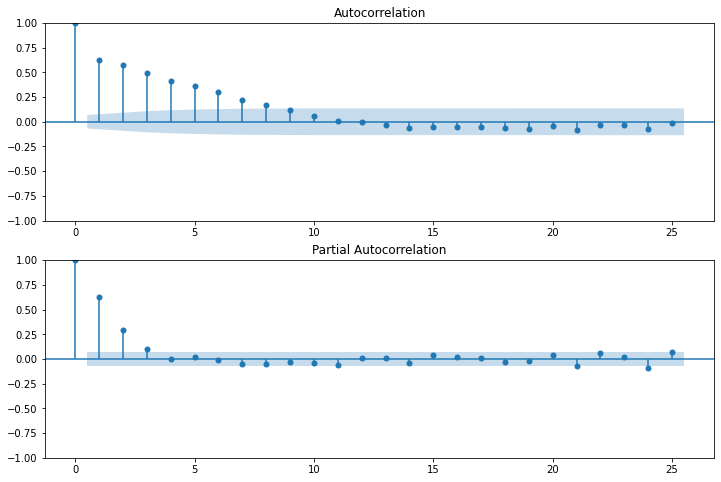

In [96]:
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df, lags=25, ax=ax2)

In [97]:
p =2

In [102]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(train_df, lags=p).fit()
print(ar_model.summary())

ar_pred = ar_model.predict(start=len(train_df), end=(len(train_df)), dynamic=False)
ar_pred

                            AutoReg Model Results                             
Dep. Variable:                    T_i   No. Observations:                  821
Model:                     AutoReg(2)   Log Likelihood                -868.728
Method:               Conditional MLE   S.D. of innovations              0.699
Date:                Thu, 11 Aug 2022   AIC                           1745.455
Time:                        07:39:39   BIC                           1764.288
Sample:                    03-01-1951   HQIC                          1752.682
                         - 05-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0308      0.025      1.247      0.212      -0.018       0.079
T_i.L1         0.4405      0.033     13.194      0.000       0.375       0.506
T_i.L2         0.2961      0.033      8.881      0.0

/Users/ymochalova/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ymochalova/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2019-06-01   -0.11579
Freq: MS, dtype: float64

In [105]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_df, ar_pred), mean_squared_error(test_df, exp_pred)

(0.147617347739979, 0.03892993162281572)